<a href="https://colab.research.google.com/github/Adith-Grokr/BankMarketing_Analysis/blob/ClassifiactionModels/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# **Read or View Data**

In [3]:
data = pd.DataFrame(bank_marketing.data.features)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [4]:
# Convert targets to a DataFrame and rename the column
targets_df = pd.DataFrame(bank_marketing.data.targets)
targets_df.columns = ['y']  # Rename the column to 'target'

# Concatenate features and targets horizontally
data = pd.concat([data, targets_df], axis=1)


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [8]:
data[data.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,NaN,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes


In [34]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Get unique values for each categorical column
unique_values_categorical = {col: data[col].unique() for col in categorical_columns}

# Display the unique values for categorical columns
for column, values in unique_values_categorical.items():
    print(f"Column '{column}' unique values: {values}")

Column 'job' unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Column 'marital' unique values: ['married' 'single' 'divorced']
Column 'education' unique values: ['tertiary' 'secondary' nan 'primary']
Column 'default' unique values: ['no' 'yes']
Column 'housing' unique values: ['yes' 'no']
Column 'loan' unique values: ['no' 'yes']
Column 'contact' unique values: [nan 'cellular' 'telephone']
Column 'month' unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column 'poutcome' unique values: [nan 'failure' 'other' 'success']
Column 'y' unique values: ['no' 'yes']


In [13]:
df_category = data.select_dtypes('object')
for col in df_category.columns:
  print(data[[col]].value_counts())
  print('')

job          
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

marital 
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

default
no         44396
yes          815
Name: count, dtype: int64

housing
yes        25130
no         20081
Name: count, dtype: int64

loan
no      37967
yes      7244
Name: count, dtype: int64

contact  
cellular     29285
telephone     2906
Name: count, dtype: int64

month
may      13766
jul       6895
aug       6247
jun       5341
nov       3970
apr       2932
feb       2649
jan       1403
oct        738
sep        579
mar        477
dec        214
Name: count, dtype: int64

poutcome
failure     4901
other       1840
succ

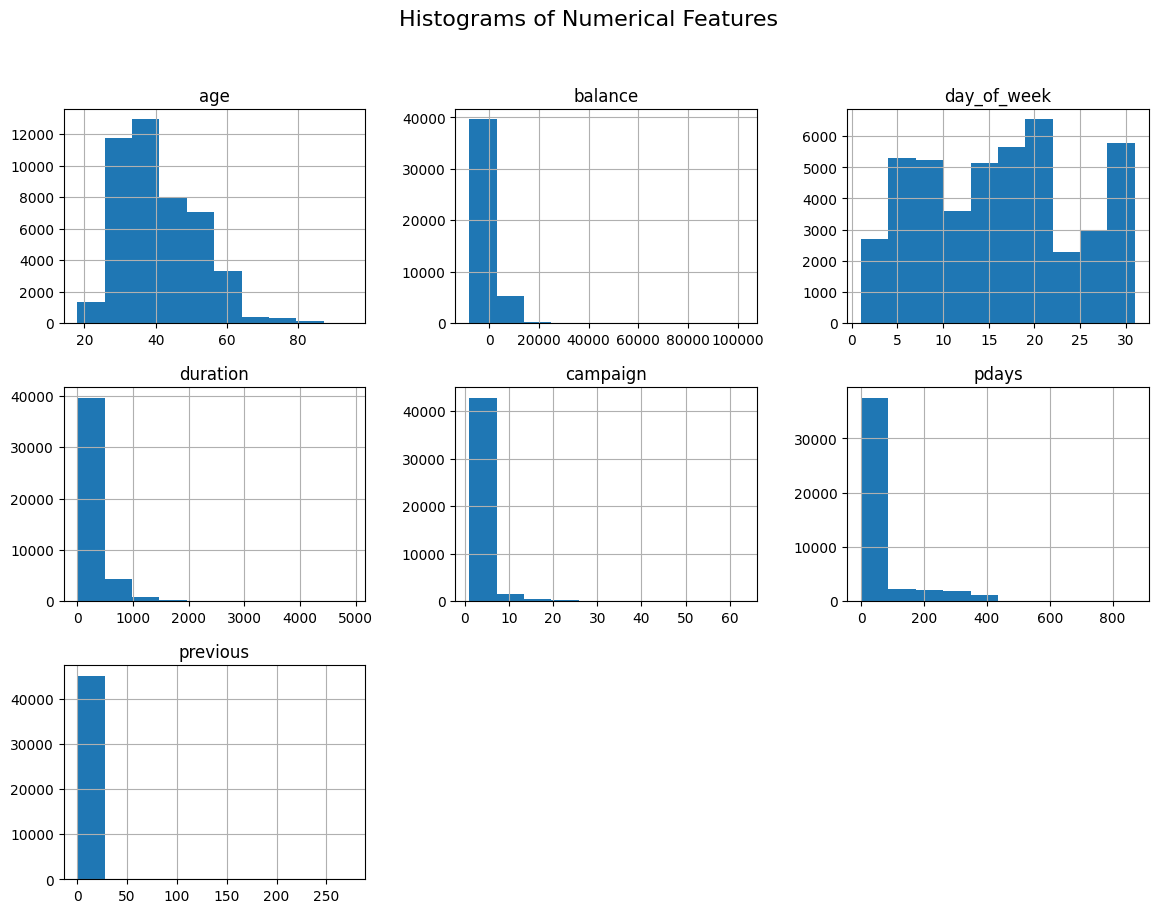

In [15]:
numerical_data = data.select_dtypes('number')

# Determine the number of numerical features
num_features = len(numerical_data.columns)

# Calculate appropriate layout dimensions
# You can adjust these based on your preference
nrows = (num_features + 2) // 3  # Calculate rows, ensuring enough space
ncols = 3  # Number of columns

# Create the histograms with the adjusted layout
numerical_data.hist(figsize=(14, 10), layout=(nrows, ncols));

# Add a title
plt.suptitle('Histograms of Numerical Features', fontsize=16)

# Display the plot
plt.show()

Text(0.5, 0.98, 'Heatmap of Numerical Features')

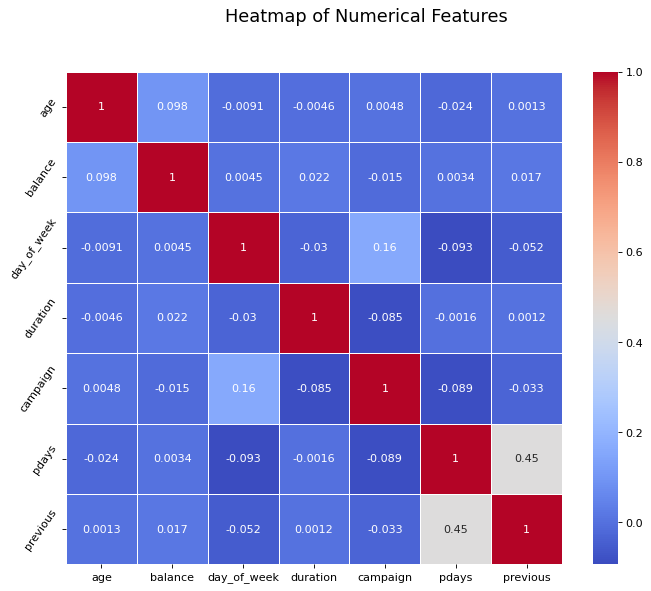

In [17]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(numerical_data.corr(),annot=True,linewidth=0.5, cmap='coolwarm')
plt.yticks(rotation=55);

plt.suptitle('Heatmap of Numerical Features', fontsize=16)

IndexError: index 6 is out of bounds for axis 0 with size 6

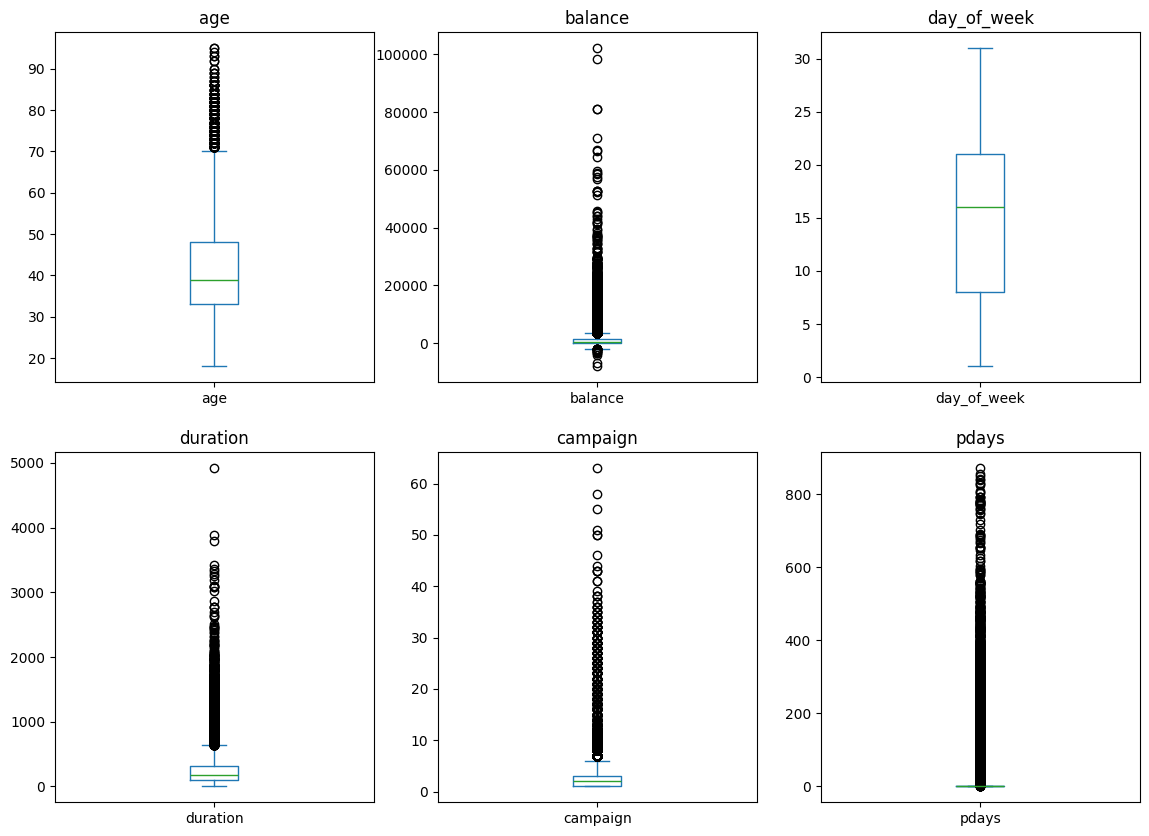

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

axes = axes.flatten()
for i, col in enumerate(numerical_data.columns):
    numerical_data[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, 2 * 3):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Balance and Conversion Rate Histogram')

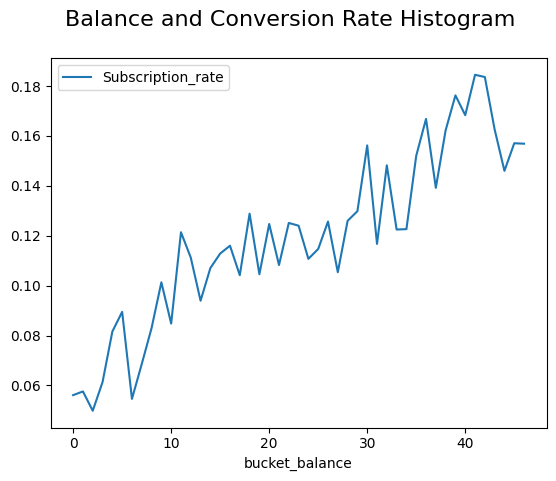

In [89]:
df1 = data.copy(deep=True)
df1['bucket_balance'] = pd.qcut(df1['balance'], 50, labels=False, duplicates = 'drop')
df1['y'] = df1['y'].map({'yes':1, 'no':0})
tmp = df1.groupby(['bucket_balance'], as_index=False)['y'].mean()
tmp = tmp.rename(columns={'y':'Subscription_rate'})
tmp.plot(x='bucket_balance', y='Subscription_rate')
plt.suptitle('Balance and Conversion Rate Histogram', fontsize=16)

It seem like even with many outliers, balance still a good features since it strongly correlate with the response columns. Use this columns as predictor would be ideally

Possible transformation:

bucketing --> ordinal encoding
normalize


In [23]:
df1 = data.copy(deep=True)
print(f"Percentage of a customer was not contacted before: {'%.2f' % (len(df1[df1['pdays'] == -1]) / len(df1) * 100)}%")

Percentage of a customer was not contacted before: 81.74%


Since there are > 50% of missing data, I will exclude this feature as well as previous and poutcome since these features represent previous campaign and have most missing values

                job      Ratio
job                           
blue-collar    9732  21.525735
management     9458  20.919688
technician     7597  16.803433
admin.         5171  11.437482
services       4154   9.188029
retired        2264   5.007631
self-employed  1579   3.492513
entrepreneur   1487   3.289023
unemployed     1303   2.882042
housemaid      1240   2.742695
student         938   2.074716


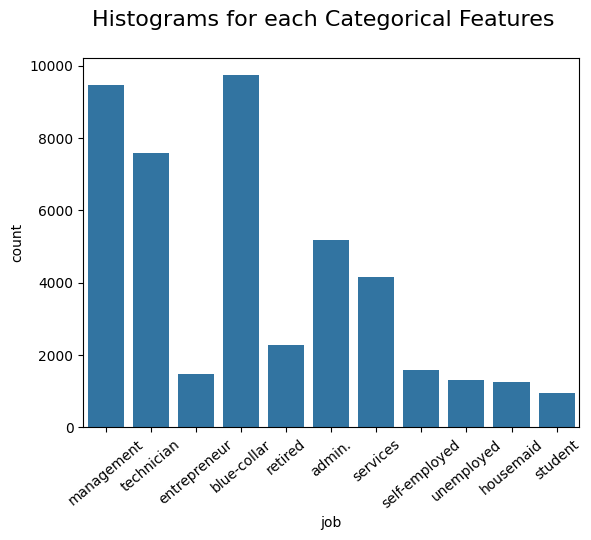

          marital      Ratio
marital                     
married     27214  60.193316
single      12790  28.289576
divorced     5207  11.517109


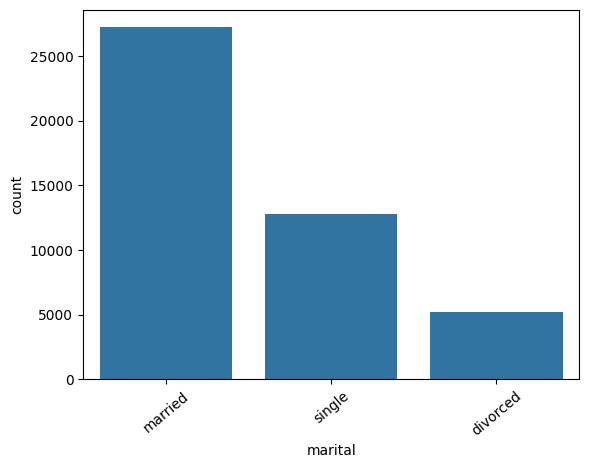

           education      Ratio
education                      
secondary      23202  51.319369
tertiary       13301  29.419831
primary         6851  15.153392


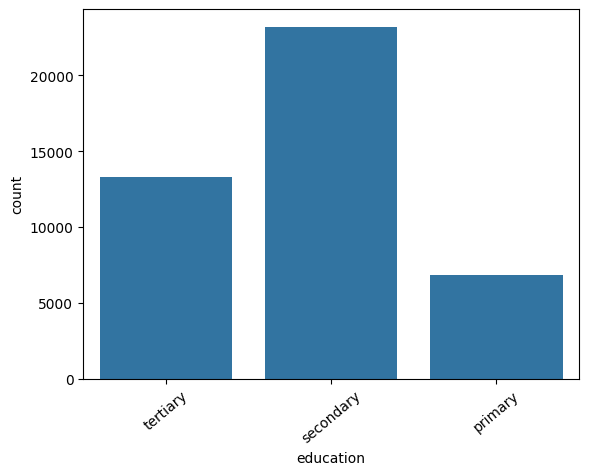

         default      Ratio
default                    
no         44396  98.197341
yes          815   1.802659


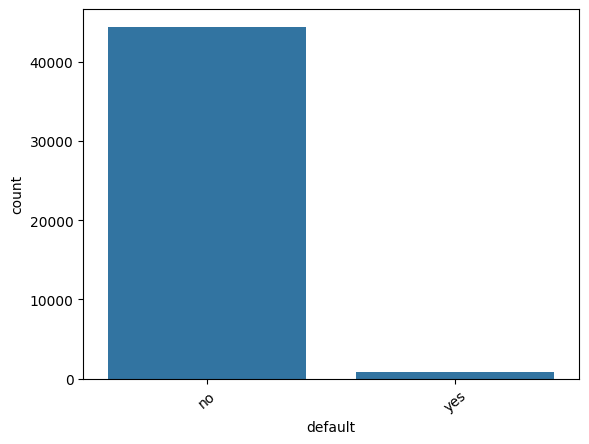

         housing      Ratio
housing                    
yes        25130  55.583818
no         20081  44.416182


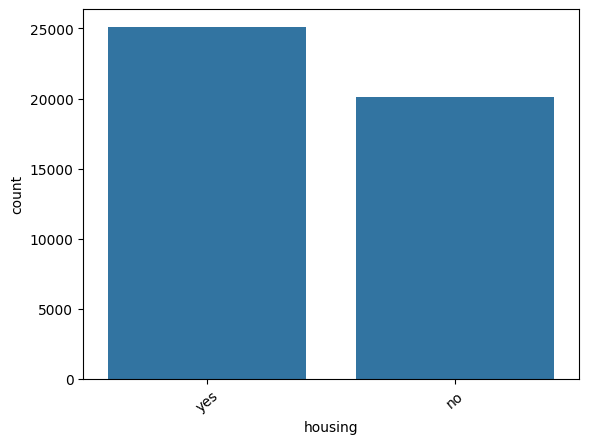

       loan      Ratio
loan                  
no    37967  83.977351
yes    7244  16.022649


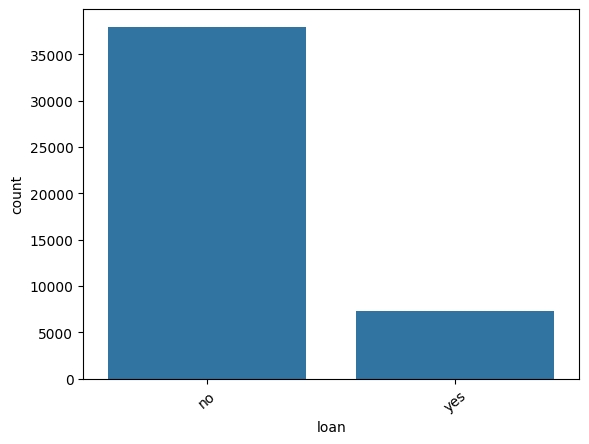

           contact      Ratio
contact                      
cellular     29285  64.774059
telephone     2906   6.427639


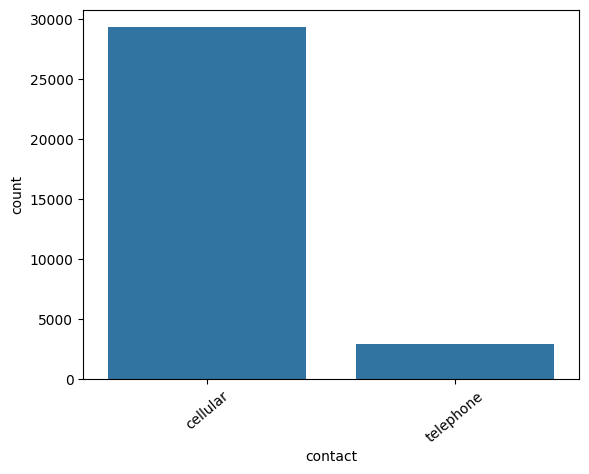

       month      Ratio
month                  
may    13766  30.448342
jul     6895  15.250713
aug     6247  13.817434
jun     5341  11.813497
nov     3970   8.781049
apr     2932   6.485147
feb     2649   5.859194
jan     1403   3.103227
oct      738   1.632346
sep      579   1.280662
mar      477   1.055053
dec      214   0.473336


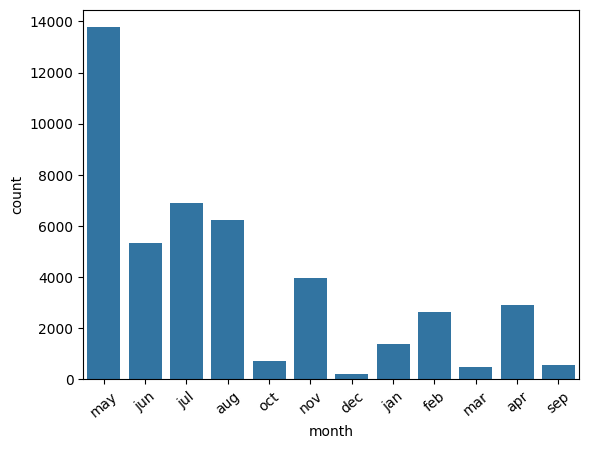

          poutcome      Ratio
poutcome                     
failure       4901  10.840282
other         1840   4.069806
success       1511   3.342107


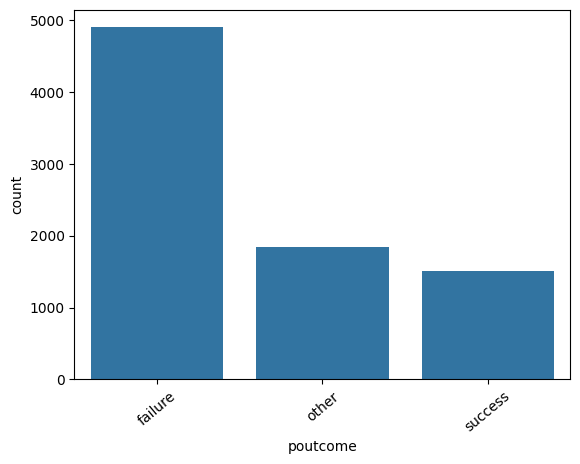

         y     Ratio
y                   
no   39922  88.30152
yes   5289  11.69848


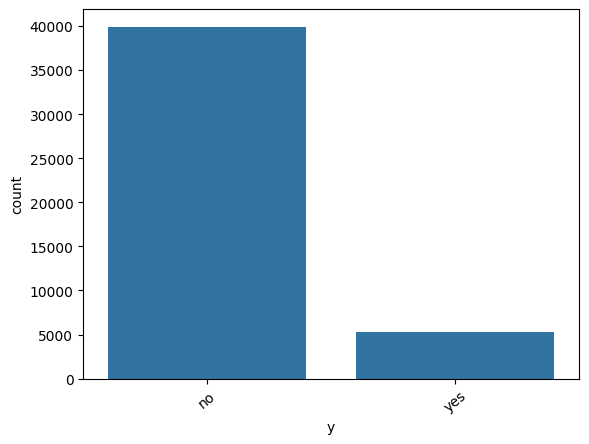

In [24]:
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  if plot:
      sns.countplot(x=dataframe[col_name], data=dataframe)
      plt.xticks(rotation=40)
      plt.show(block=True)
plt.suptitle('Histograms for each Categorical Features', fontsize=16)
column_cat = df_category.columns
for col in column_cat:
  cat_summary(df_category, col, True)

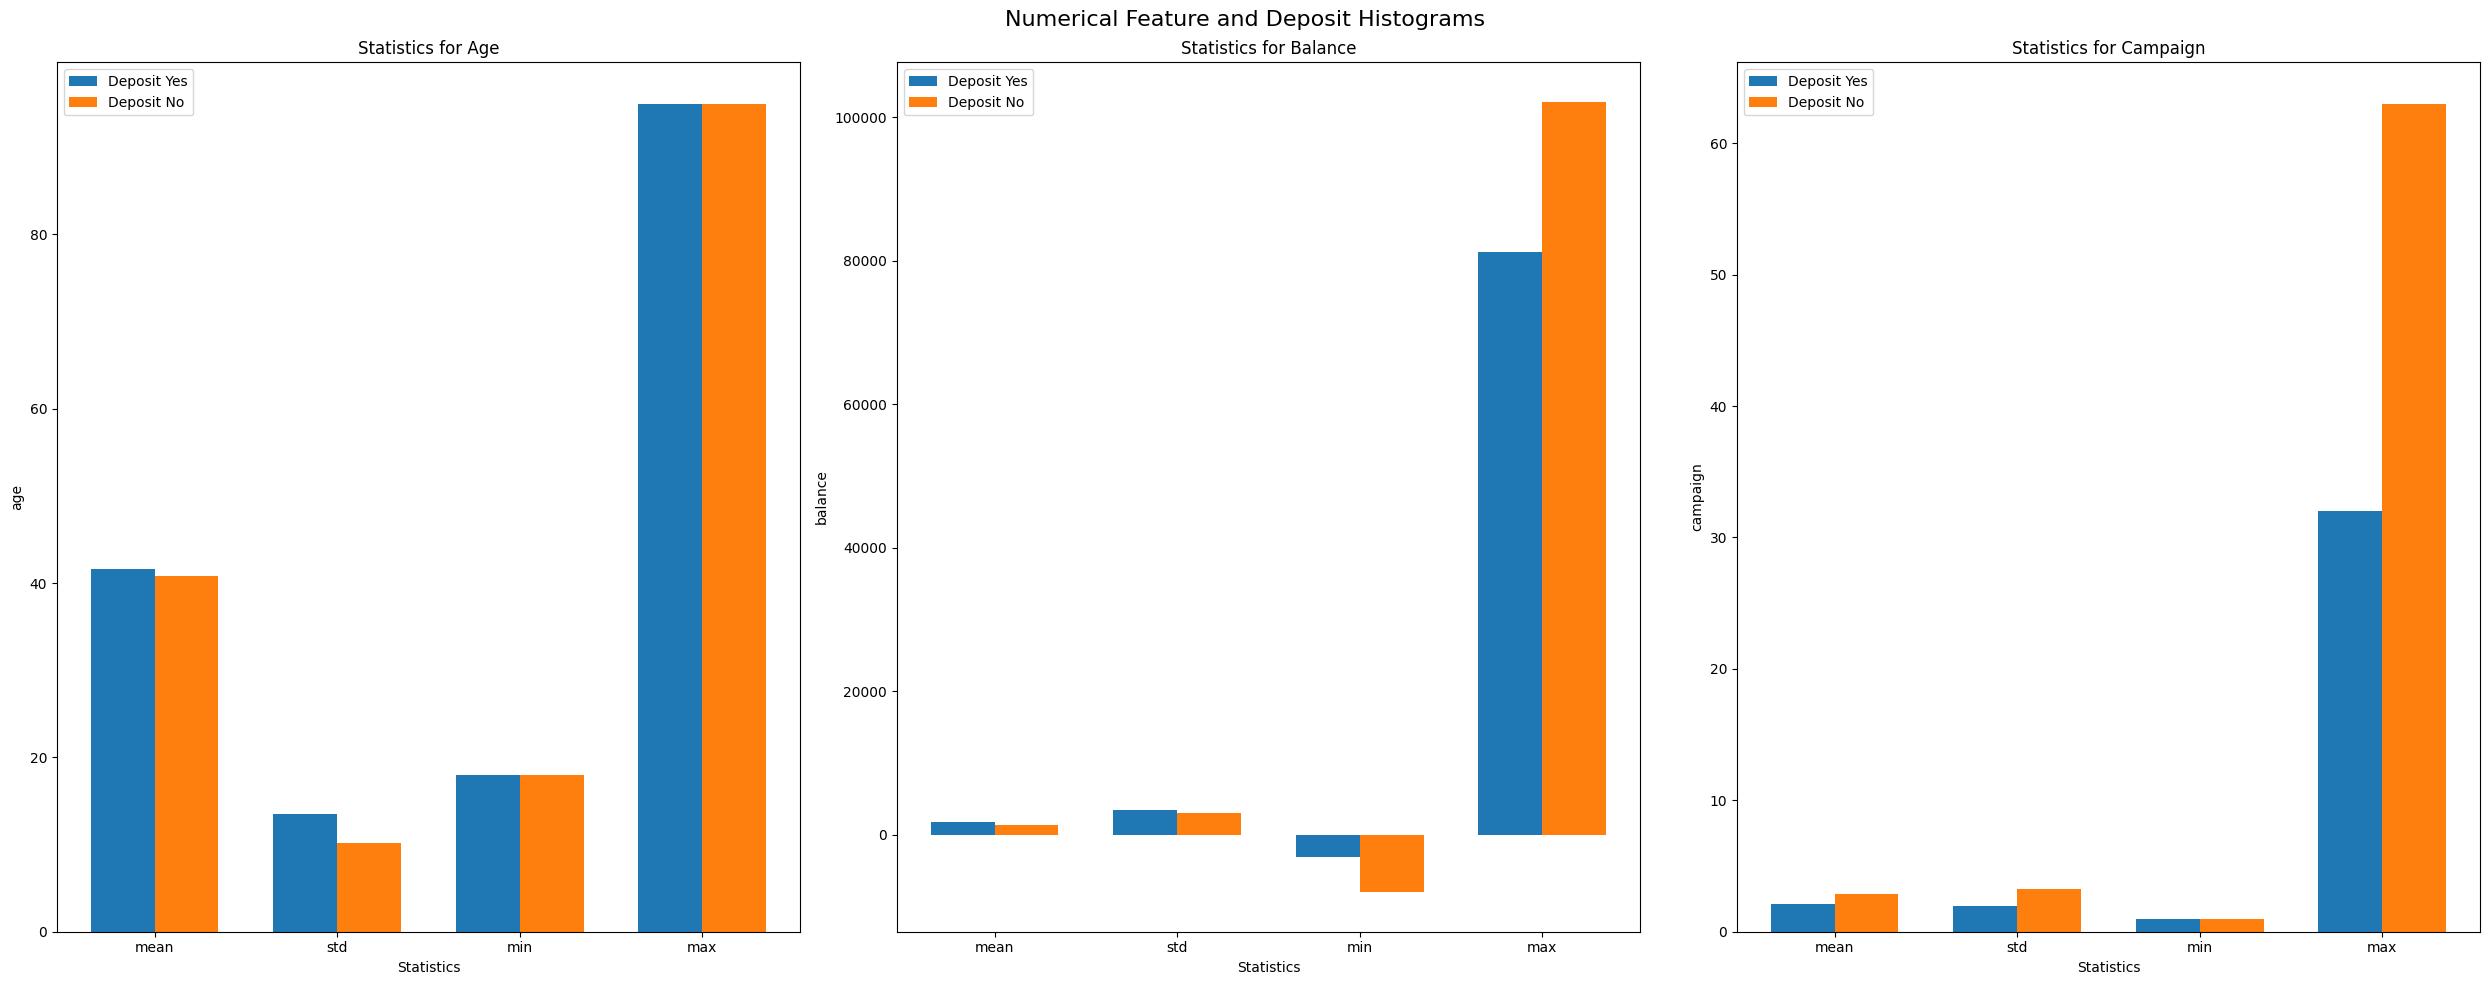

In [27]:
column_stat = ['age', 'balance', 'campaign']
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(25, 10))
for i, col in enumerate(column_stat, 0):
  df_stat = pd.DataFrame()
  df_stat[f'{col}_yes'] = (data[data['y'] == 'yes'][['y',f'{col}']].describe())[f'{col}']
  df_stat[f'{col}_no'] = (data[data['y'] == 'no'][['y',f'{col}']].describe())[f'{col}']
  stats = ['mean', 'std', 'min', 'max']
  width = 0.35
  x = np.arange(len(stats))
  axes[i].bar(
      x - width / 2,  # x positions for 'yes'
      df_stat.loc[stats, f'{col}_yes'],
      width,
      label=f'Deposit Yes',
  )

  axes[i].bar(
      x + width / 2,
      df_stat.loc[stats, f'{col}_no'],
      width,
      label=f'Deposit No',
  )
  axes[i].set_xlabel('Statistics')
  axes[i].set_ylabel(col)
  axes[i].set_title(f'Statistics for {col.capitalize()}')
  axes[i].set_xticks(x)
  axes[i].set_xticklabels(stats)
  axes[i].legend()
plt.suptitle('Numerical Feature and Deposit Histograms', fontsize=16)
plt.tight_layout()
plt.show()

Looking at the diagrams above I can conclude that:

People who subscribed for term deposit tend to have greater balance and age values

People who subscribed for term deposit tend to have fewer number of contacts during this campaign

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [29]:
df = data.copy(deep=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [35]:
df['old_customer'] = np.where(df['pdays'] == -1, 0, 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,old_customer
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,0



I notice that although pdays, poutcome, previous has numerous missisng values, but adding a feature that wherether or not a customer is contacted before can be useful


In [36]:
# drop pdays, poutcome, previous
df = df.drop(columns=['pdays', 'poutcome', 'previous'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,y,old_customer
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no,0


In [38]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

print(f'Shape before deleting outliers: {df.shape}\n')
col_tmp = df.select_dtypes('number').columns
for col in col_tmp:
  df = remove_outlier(df, col)
print(f'Shape after deleting outliers: {df.shape}')
df.head()

Shape before deleting outliers: (44425, 15)

Shape after deleting outliers: (44227, 15)


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,y,old_customer
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no,0


In [39]:
df= df.fillna('unknown')


In [41]:
# normalize numerical data
def normalize_data(df, columns, method='standardization'):
    if method == 'min-max':
        scaler = MinMaxScaler()
    elif method == 'standardization':
        scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df
df = normalize_data(df, df.select_dtypes('number').columns)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,y,old_customer
0,1.612108,management,married,tertiary,no,0.506034,yes,no,unknown,-1.293184,may,0.026427,-0.699672,no,-0.476117
1,0.291910,technician,single,secondary,no,-0.584422,yes,no,unknown,-1.293184,may,-0.437981,-0.699672,no,-0.476117
2,-0.745388,entrepreneur,married,secondary,no,-0.598350,yes,yes,unknown,-1.293184,may,-0.754622,-0.699672,no,-0.476117
3,0.574810,blue-collar,married,unknown,no,0.177453,yes,no,unknown,-1.293184,may,-0.687072,-0.699672,no,-0.476117
4,-0.745388,unknown,single,unknown,no,-0.598865,no,no,unknown,-1.293184,may,-0.239552,-0.699672,no,-0.476117


In [42]:
df['y'] = df['y'].map({'yes':1,'no':0})
df['y'].head()

,y
0,0
1,0
2,0
3,0
4,0


In [45]:
# encoding categorical data
def onehot_encoder(df, columns):
  encoder = OneHotEncoder(sparse_output=False, drop='first')
  encoded_data = encoder.fit_transform(df[columns])
  encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))
  df_encoded = pd.concat([df.drop(columns, axis=1), encoded_df], axis=1)
  return df_encoded
df = onehot_encoder(df, df.select_dtypes('object').columns)
df = df.dropna()
df.head()

,age,balance,day_of_week,duration,campaign,y,old_customer,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.612108,0.506034,-1.293184,0.026427,-0.699672,0.0,-0.476117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.291910,-0.584422,-1.293184,-0.437981,-0.699672,0.0,-0.476117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.745388,-0.598350,-1.293184,-0.754622,-0.699672,0.0,-0.476117,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.574810,0.177453,-1.293184,-0.687072,-0.699672,0.0,-0.476117,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.745388,-0.598865,-1.293184,-0.239552,-0.699672,0.0,-0.476117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: xlabel='y'>

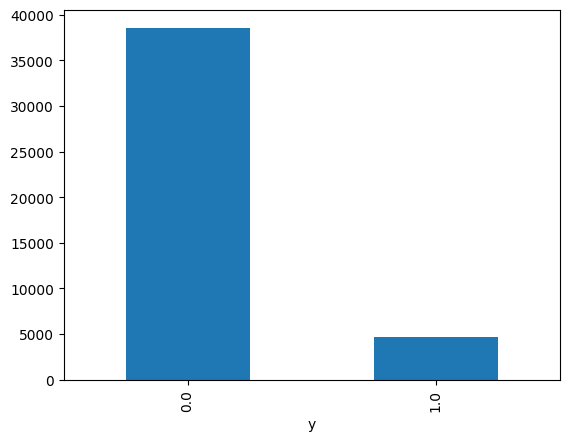

In [46]:
df['y'].value_counts().plot(kind='bar')

In [47]:
X=df.drop('y',axis=1)
Y=df['y']


In [48]:
X

,age,balance,day_of_week,duration,campaign,old_customer,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.612108,0.506034,-1.293184,0.026427,-0.699672,-0.476117,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.291910,-0.584422,-1.293184,-0.437981,-0.699672,-0.476117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.745388,-0.598350,-1.293184,-0.754622,-0.699672,-0.476117,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.574810,0.177453,-1.293184,-0.687072,-0.699672,-0.476117,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.745388,-0.598865,-1.293184,-0.239552,-0.699672,-0.476117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44222,-1.028288,-0.535935,0.152950,-0.796841,-0.699672,2.100322,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44223,-0.839688,-0.514786,0.152950,-0.995270,-0.699672,-0.476117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44224,-0.179589,0.673162,0.393973,-0.201555,-0.250649,2.100322,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44225,-0.651088,-0.183625,0.393973,-0.007348,0.198373,2.100322,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
Y

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
44222,0.0
44223,0.0
44224,1.0
44225,1.0


# Normalize The Data

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [54]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',Y_train.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',Y_test.shape)

train features shape:  (34604, 38)
train target   shape:  (34604,)
__________

test  features shape:  (8651, 38)
test  target   shape:  (8651,)


In [78]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score','roc_auc'])

# Train **Model**

# **Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [56]:
prediction=model.predict(X_test)

In [57]:
prediction

array([0., 0., 0., ..., 0., 1., 0.])

In [58]:
Y_test

,y
10310,0.0
9819,0.0
43335,1.0
13253,0.0
35823,0.0
...,...
36231,0.0
35430,0.0
44003,0.0
39107,1.0


# Evaluation

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(Y_test,prediction)

In [60]:
accuracy

0.8958501907293954

In [61]:
report=classification_report(Y_test,prediction)

In [62]:
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      7693
         1.0       0.57      0.25      0.34       958

    accuracy                           0.90      8651
   macro avg       0.74      0.61      0.64      8651
weighted avg       0.87      0.90      0.88      8651



Class Imbalance: If your dataset has a significant imbalance between class 0 and class 1 (e.g., many more class 0 samples than class 1), a high precision for the majority class (class 0) might not be as impressive. In such cases, the performance on the minority class (class 1) is more crucial.


<Axes: xlabel='y'>

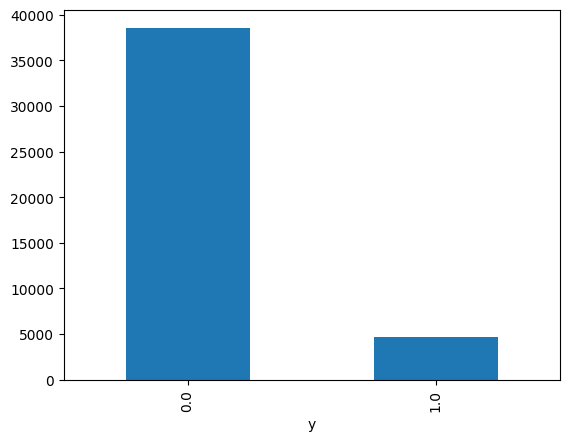

In [63]:
df['y'].value_counts().plot(kind='bar')

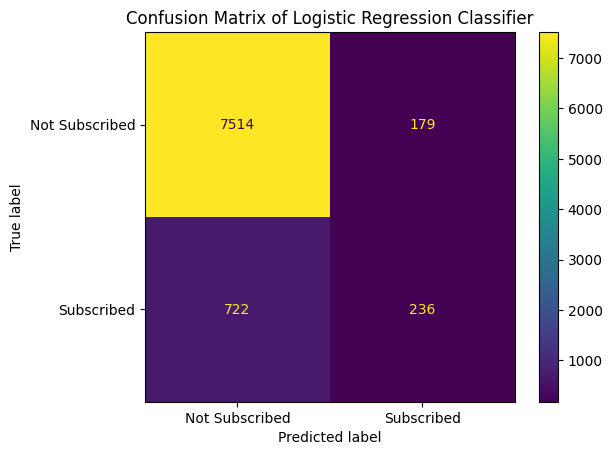

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_matrix = confusion_matrix(Y_test,prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Subscribed','Subscribed'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

In [83]:
from sklearn.metrics import roc_curve, auc ,accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test,prediction)
roc_auc = auc(fpr, tpr)

In [84]:
model_result = ['Logistic Regression',accuracy_score(Y_test,prediction),
              precision_score(Y_test,prediction), recall_score(Y_test,prediction),
              f1_score(Y_test,prediction),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Logistic Regression,0.89585,0.568675,0.246347,0.343773,0.611539


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      7693
         1.0       0.39      0.38      0.39       958

    accuracy                           0.87      8651
   macro avg       0.66      0.65      0.66      8651
weighted avg       0.86      0.87      0.86      8651



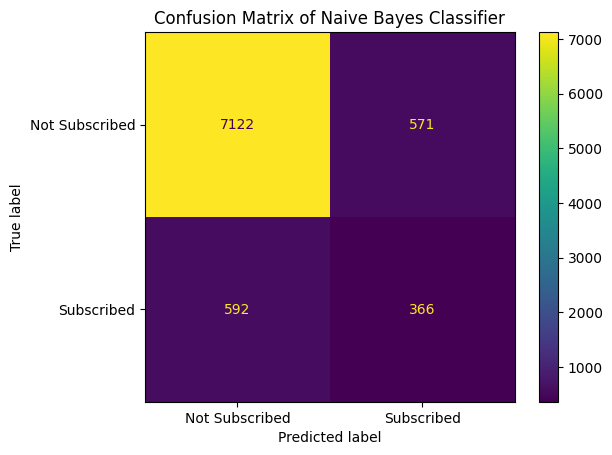

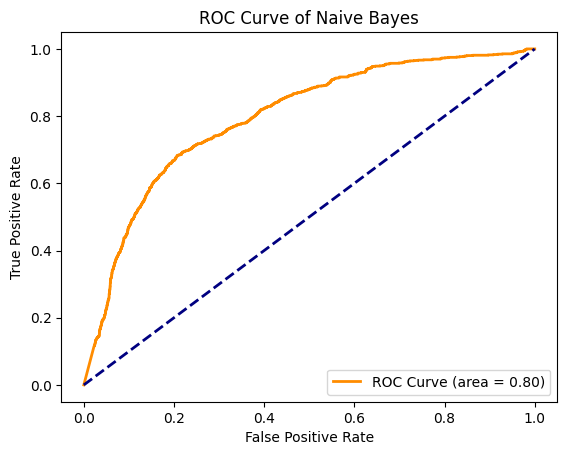

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      7693
         1.0       0.54      0.27      0.36       958

    accuracy                           0.89      8651
   macro avg       0.73      0.62      0.65      8651
weighted avg       0.87      0.89      0.88      8651



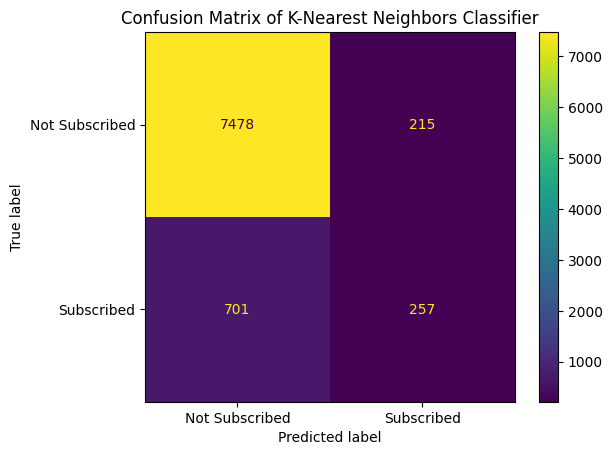

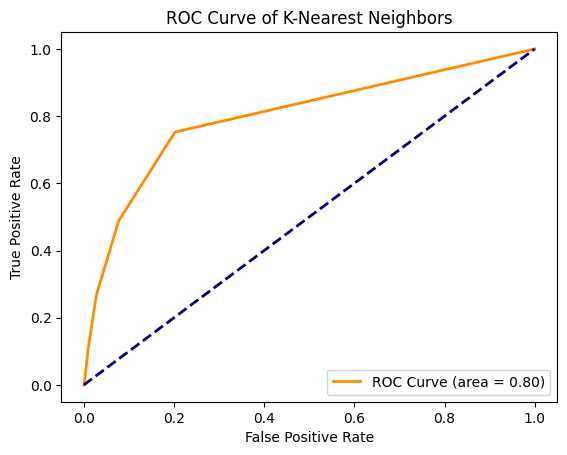

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      7693
         1.0       0.41      0.42      0.41       958

    accuracy                           0.87      8651
   macro avg       0.67      0.67      0.67      8651
weighted avg       0.87      0.87      0.87      8651



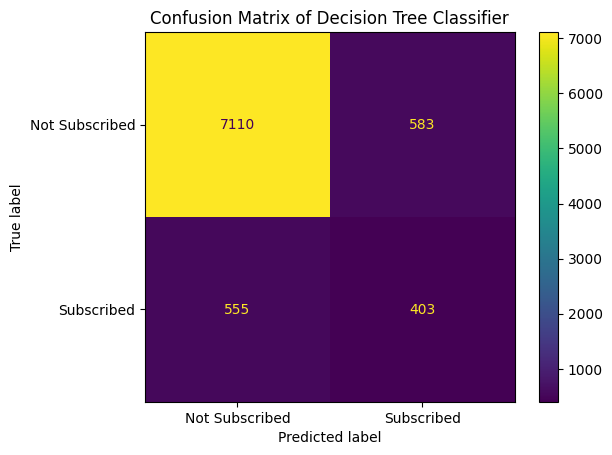

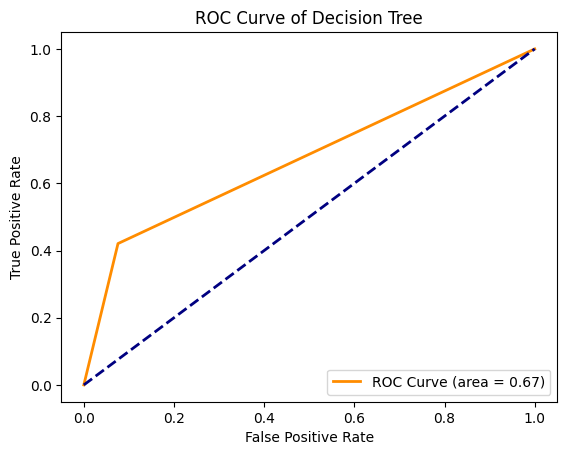

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7693
         1.0       0.61      0.31      0.41       958

    accuracy                           0.90      8651
   macro avg       0.76      0.64      0.68      8651
weighted avg       0.88      0.90      0.89      8651



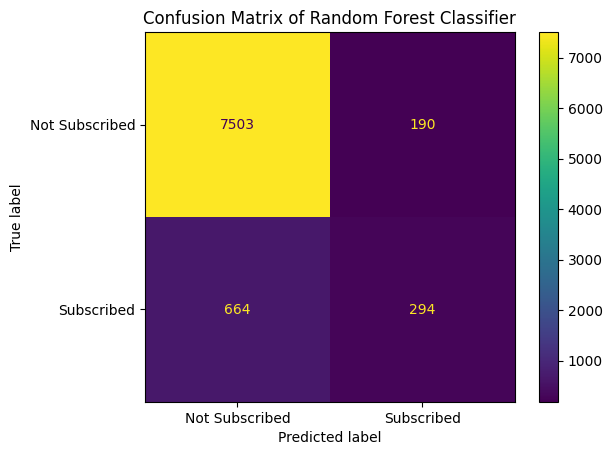

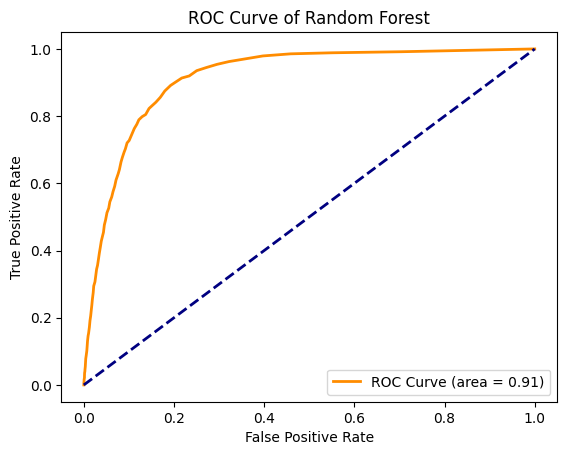

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      7693
         1.0       0.60      0.43      0.50       958

    accuracy                           0.90      8651
   macro avg       0.76      0.70      0.72      8651
weighted avg       0.89      0.90      0.90      8651



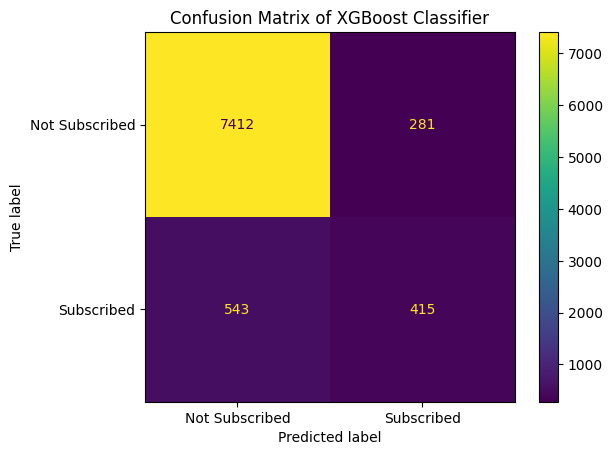

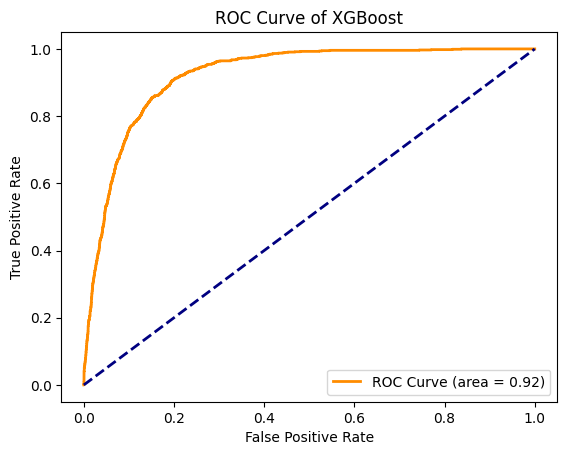

Summary of Results:
            Model Name  Accuracy  Precision Score  Recall Score  F1-Score  \
0  Logistic Regression  0.895850         0.568675      0.246347  0.343773   
1          Naive Bayes  0.865565         0.390608      0.382046  0.386280   
2  K-Nearest Neighbors  0.894116         0.544492      0.268267  0.359441   
3        Decision Tree  0.868455         0.408722      0.420668  0.414609   
4        Random Forest  0.901283         0.607438      0.306889  0.407767   
5              XGBoost  0.904751         0.596264      0.433194  0.501814   

    roc_auc  
0  0.611539  
1  0.795521  
2  0.799186  
3  0.672442  
4  0.913302  
5  0.921317  


In [85]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to evaluate and display results
def evaluate_model(model, model_name):
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    # Accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction)
    recall = recall_score(Y_test, prediction)
    f1 = f1_score(Y_test, prediction)
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    # Save results
    results.loc[len(results)] = [model_name, accuracy, precision, recall, f1, roc_auc]
    # Classification report
    print(f"Classification Report for {model_name}:\n", classification_report(Y_test, prediction))
    # Confusion Matrix
    cm_matrix = confusion_matrix(Y_test, prediction)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix, display_labels=['Not Subscribed', 'Subscribed'])
    cm_display.plot()
    plt.title(f"Confusion Matrix of {model_name} Classifier")
    plt.show()
    # ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Naive Bayes
evaluate_model(GaussianNB(), "Naive Bayes")

# K-Nearest Neighbors (KNN)
evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")

# Decision Tree
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")

# Random Forest
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# XGBoost
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")

# Display all results
print("Summary of Results:")
print(results)


# Evaluation and comaprison

In [86]:
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Logistic Regression,0.895850,0.568675,0.246347,0.343773,0.611539
1,Naive Bayes,0.865565,0.390608,0.382046,0.386280,0.795521
2,K-Nearest Neighbors,0.894116,0.544492,0.268267,0.359441,0.799186
3,Decision Tree,0.868455,0.408722,0.420668,0.414609,0.672442
4,Random Forest,0.901283,0.607438,0.306889,0.407767,0.913302
5,XGBoost,0.904751,0.596264,0.433194,0.501814,0.921317


# Accuracy Comparison

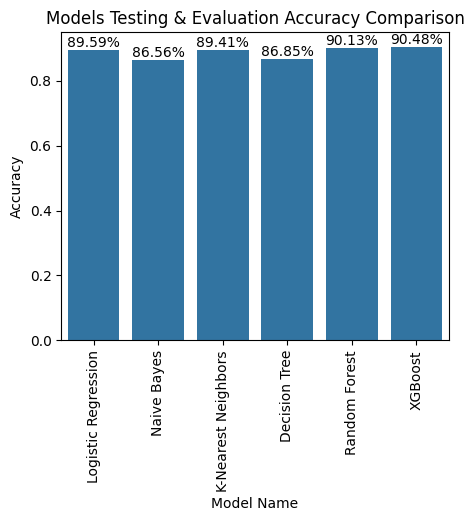

In [88]:
import seaborn as sns
plt.subplots(figsize=(5, 4))
ax = sns.barplot(x="Model Name", y="Accuracy", data=results)
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Accuracy Comparison')

# Add hover functionality
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}%'.format(p.get_height() * 100),
            ha="center", va="bottom")

plt.show()